# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM 1**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Climate Change Tweet Classification Challenge

<!-- The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are.  -->

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering/Preprocessing</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. App and Model Explanations</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

The end goal of this research is to look at the tweets from individuals and determine if that particular person believe in the climate change or not. At the end we shall create a model that is able to perfom this task well and deploying using streamlit so that it can be available for everyone to use.

 <a id="one"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [65]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import re
import wordcloud
from collections import Counter
from wordcloud import WordCloud
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Libraries for data preparation and model building
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
#nltk.download('punkt')
from nltk.stem.wordnet import WordNetLemmatizer
from string import punctuation


# Libraries from Sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [2]:
train_data = pd.read_csv('train.csv') # load the train data
test_data = pd.read_csv('test.csv')  # load the test data

#### Loading and displaying an overview of the data

In [3]:
#overview dataset
print(f' There are {train_data.shape[0]} rows and {train_data.shape[1]} columns')
train_data.head(3)

 There are 15819 rows and 3 columns


sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562

<a id="three"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



##### Let us Explain the Features in our Training Data

In [4]:
# calling the head function to display the FIVE top records of the data
train_data.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

Our training Data contains 3 features, namely:

 * Sentiment (dependent variable)
 * Message
 * TweetId

Feature descriptions

    1. sentiment: This is the sentiment of tweets made by users and it will be our dependent variable. This is the feature our model  wil have to predict when we show it our test data.
    
    2. message: This is the content of the tweets provided 
    
    3. tweetid: This is the ID (number identity) of each of the tweets at the time it was given


##### We will explain what the values i.e classes in our dependent variable mean

The ***Sentiment*** feature have these values:

   * 2 News: the tweet links to factual news about climate change
   * 1 Pro: the tweet supports the belief of man-made climate change
   * 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
   * -1 Anti: the tweet does not believe in man-made climate change

Class definion source: https://www.kaggle.com/competitions/edsa-climate-change-belief-analysis-2022/data

###### Looking at the Features in the Test Set

In [5]:
test_data.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

The test data contains two features, which are:

 * Message
 * TweetId
 
This makes sense because we want our model to look at this data and predict the sentiment of the Tweet's author on Climate Change.

#### Data Information

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
sentiment    15819 non-null int64
message      15819 non-null object
tweetid      15819 non-null int64
dtypes: int64(2), object(1)
memory usage: 370.8+ KB


We have in our dataframe a total of 3 columns          
The sentiment and tweetid contains numbers i.e numerical with datatype int64      
The message column contains texts with datatypes object

***Note that we would need to vectorize i.e convert those texts into numbers that our Machine Learning model can interpret***


In [7]:
#check if there are null values in our data
train_data.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

From the above cell, there are no null values in our data which makes it easy to carry out processsing.

Let us proceed to see the size of our dataset

In [8]:
train_data.shape

(15819, 3)

From the data, we have a total of 15819 observations and 3 columns

Let us Print off a list of all the sentiment types present in the dataset

In [9]:
type_Sentiments = list(train_data.sentiment.unique())
print(type_Sentiments)

[1, 2, 0, -1]


Just as we described in the data overview, we have 4 classes in our sentiment column 

Let's have a look at how many data samples we have for each of the different sentiment types.

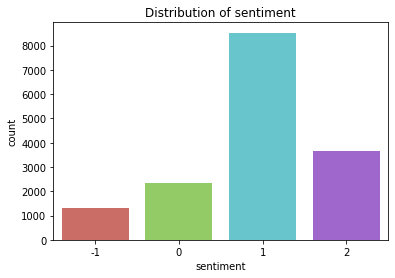

In [10]:
sns.countplot(x = 'sentiment', data = train_data, palette="hls")
plt.title("Distribution of sentiment");

There is obviously an imbalance in the various classes.

Let us check the percentage of these classes to understand the imbalance we just observed 


we have the percentage for categorical columns as: 
 1    53.922498
 2    23.010304
 0    14.874518
-1     8.192680
Name: sentiment, dtype: float64


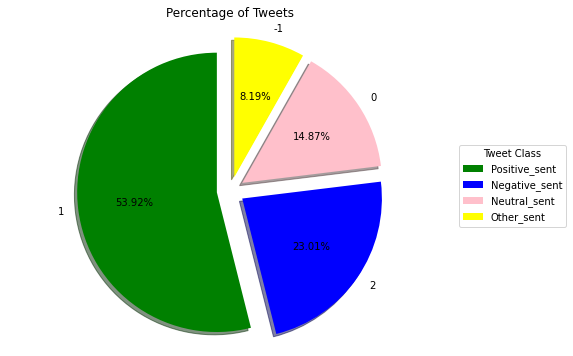

In [11]:
## Check the Percentage of the distribution in our data 
print("we have the percentage for categorical columns as: ")
d = train_data['sentiment'].value_counts(normalize = True) * 100 # series
print(d)


#Defining Parameters
labels = train_data['sentiment'].unique()

classes = ['Positive_sent','Negative_sent','Neutral_sent','Other_sent']

colors = ['green','blue','pink','yellow']

sizes= [53.922498, 23.010304, 14.874518, 8.192680]

#Creating a plot
fig, ax = plt.subplots(figsize =(8, 6))
ax.pie(sizes,labels=labels, colors=colors, startangle=90, 
        shadow=True,explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%', )

# Adding legend
ax.legend(classes,
          title = "Tweet Class",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.title('Percentage of Tweets')

plt.axis('equal')

plt.show()

From the observations seen in both visualizations, we can conclude that:
   1. The sentiment types are unevenly distributed 
   2. Pro(1) has over 8000 data samples represented as the highest and taking about 54% of the overall data
   3. Anti(-1) has the lowest data samples represented with a little above 1000 samples and contains just 8% of the overall data
   
We would carry out Resampling i.e To balance the data set in the Preprocessing Chapter of our notebook
   

##### Next we will carry out a count of  the most common words in our data 

In [12]:
train_data['temp_list'] = train_data['message'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(15))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='YlGnBu')

Let us visualize this counts

In [13]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

From the above image and counts in the previous cell, we can see that Climate has the most mentions or common words.
This is not suprising as it is the main theme of the project we are working on.

Another observation we can see is that words or mentions like RT, and other bag of words (to, the, off, a, in, on, and, etc) are also taking a huge chunk of the most common words.
This can be attributed to them forming the context of words and sentences

### Next, we will visualize these common words using Word Cloud for the various sentiment categories 

#### Let us Vitualize using WordClouds

We will be building wordclouds in the following order:

   * WordCloud of Tweets showing Neutrality i.e 0
   * WordCloud of Tweets Supporting Claim i.e 1
   * WordCloud of Tweets Not Supporting Claim i.e -1
   * WordCloud of Tweets with links to factual news about climate change i.e 2



In [14]:
# Classify each sentiment into categories
Positive_sent = train_data[train_data['sentiment']== 1]
Negative_sent = train_data[train_data['sentiment']== -1]
Neutral_sent = train_data[train_data['sentiment']== 0]
Other_sent = train_data[train_data['sentiment']== 2]

In [15]:

def plot_wordcloud(message, mask=None, max_words=200, max_font_size=100, figure_size=(8,8), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(message))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '/kaggle/input/masks-for-wordclouds/'

##### WORDCLOUD OF NEUTRAL TWEETS

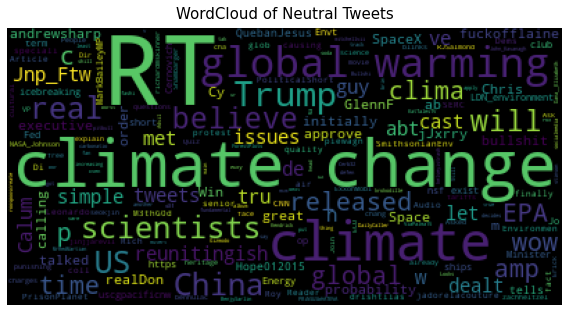

In [16]:
#to get the wordcloud of Neutral Tweet
plot_wordcloud(Neutral_sent.message,color='black',max_font_size=70,
               title_size=15,title="WordCloud of Neutral Tweets")

#### WORDCLOUD OF POSITIVE TWEETS

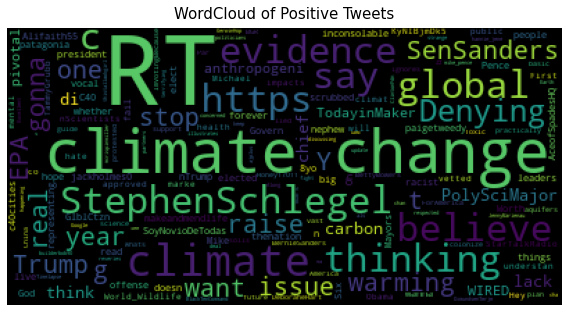

In [17]:
# to get the wordcloud of Positive Tweets
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(Positive_sent.message,color='black',max_font_size=70,
               title_size=15,title="WordCloud of Positive Tweets")

##### WORDCLOUD OF NEGATIVE TWEETS

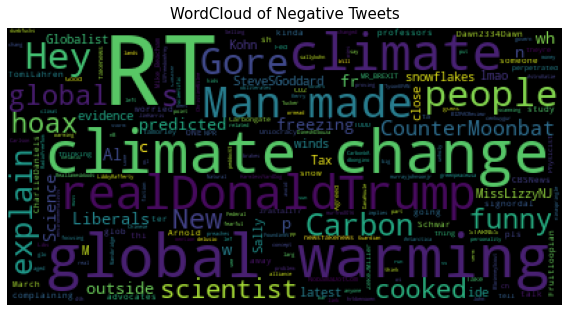

In [18]:
# to get the wordcloud of negative tweets
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(Negative_sent.message,color='black',max_font_size=70,
               title_size=15,title="WordCloud of Negative Tweets")

##### WORDCLOUD OF OTHER TWEET

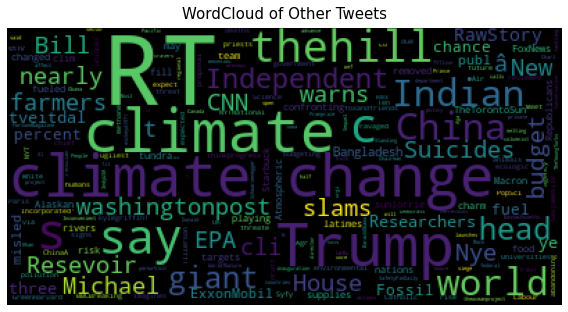

In [19]:
# to get the wordcloud of negative tweets
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(Other_sent.message,color='black',max_font_size=70,
               title_size=15,title="WordCloud of Other Tweets")

<a id="four"></a>
## 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


 **Feature Engineering:**

   * The number of words in a text
   * The number of unique words in a text
   * The number of unique characters in a text
   *  Number of stopwords
   * Number of Title case words
   * Avg length of words in a text

**Text Preprocessing:**

   * Spelling corections
   * Converting to lowercase
   * Remove special characters
   * Remove stopwords/ urls
   
   
**Resampling**

   * Upsampling



---

#### Feature Engineering

In [20]:
train_data.head(3)

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   

                                           temp_list  
0  [PolySciMajor, EPA, chief, doesn't, think, car...  
1  [It's, not, like, we, lack, evidence, of, anth...  
2  [RT, @RawStory:, Researchers, say, we, have, t...

In [21]:
# ## The  number of Words in a text
# len(train_data['message'][8].split())

In [22]:
def creat_num_word(df):

    x = []
    for index, row in df.iterrows():

        x.append(len(df['message'][index].split()))
    dict_x = {'Num_word':x}


    new_df = pd.DataFrame(dict_x)
    df['Num_words'] = new_df
    
    return df

creat_num_word(train_data).head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                           temp_list  Num_words  
0  [PolySciMajor, EPA, chief, doesn't, think, car...         19  
1  [It's, not, like, we, lack, evidence, of, anth...         10  
2  [RT, @RawStory:, Researchers, say, we, have, t...         19  
3  [#TodayinMaker#, WIRED, :, 2016, was, a, pivot...         15  
4  [RT, @SoyNovioDeTodas:, It's, 2016,, and, a, r...         18

In [23]:

# ## The number of Unique Words in a text
# unique_word = train_data['message'][8].split()
# len(set(unique_word))

In [24]:
def creat_uniq_word(df):

    x = []
    for index, row in df.iterrows():
        
        unique_word = df['message'][index].split()
    

        x.append(len(set(unique_word)))
    dict_x = {'Uniq_word':x}


    new_df = pd.DataFrame(dict_x)
    df['No_Uniq_words'] = new_df
    
    return df

In [25]:
creat_uniq_word(train_data).head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                           temp_list  Num_words  No_Uniq_words  
0  [PolySciMajor, EPA, chief, doesn't, think, car...         19             19  
1  [It's, not, like, we, lack, evidence, of, anth...         10             10  
2  [RT, @RawStory:, Researchers, say, we, have, t...         19             19  
3  [#TodayinMaker#, WIRED, :, 2016, was, a, pivot...         15             15  
4  [RT, @SoyNovioDeTodas:, It's, 2016,, and, a, r...         18             18

In [26]:
## The number of Unique Characters in a text
unique = []
for char in train_data['message'][8][::]:
    if char not in unique:
        unique.append(char)
print((unique))
print('\n')
print(len(unique))

['@', 'A', 'c', 'e', 'o', 'f', 'S', 'p', 'a', 'd', 's', 'H', 'Q', ' ', 'M', 'y', '8', 'n', 'h', 'w', 'i', 'l', 'b', '.', 't', 'g', 'k', 'm', ',', 'u', 'r']


31


In [27]:
## Number of stopwords

stopwords_list = stopwords.words('english')
#print(stopwords_list)

#x = r"['The first day in Montclair State University I was very nervouse but I was calm at first, so I'm]"

word_tokens = word_tokenize(train_data['message'][8]) #

stopwords_x = [w for w in word_tokens if w in stopwords_list]
#len(stopwords_x) / len(word_tokens) * 100
len(stopwords_x)

9

In [28]:
# stopwords_list = stopwords.words('english')
# x = []
# for index, rows in train_data.iterrows():
#     stopwords_x = [w for w in rows.message if w in stopwords_list]
#     x.append(len(stopwords_x))
    

## Would come back to it


### Text Preprocessing

Spelling corrections    
Converting to lowercase  
Remove special characters  
Remove stopwords/ urls  

In [29]:
# emojis defined
emoji_pattern = re.compile("["
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

The function below replaces emojis i.e (happy or sad) unicode  found in our text data with either happy or sad

In [30]:

def replace_emojis(t):
  '''
  This function replaces happy unicode emojis with "happy" and sad unicode emojis with "sad.
  '''
  emoji_happy = ["\U0001F600", "\U0001F601", "\U0001F602","\U0001F603","\U0001F604","\U0001F605", "\U0001F606", "\U0001F607", "\U0001F609", 
                "\U0001F60A", "\U0001F642","\U0001F643","\U0001F923",r"\U0001F970","\U0001F60D", r"\U0001F929","\U0001F618","\U0001F617",
                r"\U000263A", "\U0001F61A", "\U0001F619", r"\U0001F972", "\U0001F60B", "\U0001F61B", "\U0001F61C", r"\U0001F92A",
                "\U0001F61D", "\U0001F911", "\U0001F917", r"\U0001F92D", r"\U0001F92B","\U0001F914","\U0001F910", r"\U0001F928", "\U0001F610", "\U0001F611",
                "\U0001F636", "\U0001F60F","\U0001F612", "\U0001F644","\U0001F62C","\U0001F925","\U0001F60C","\U0001F614","\U0001F62A",
                "\U0001F924","\U0001F634", "\U0001F920", r"\U0001F973", r"\U0001F978","\U0001F60E","\U0001F913", r"\U0001F9D0"]

  emoji_sad = ["\U0001F637","\U0001F912","\U0001F915","\U0001F922", r"\U0001F92E","\U0001F927", r"\U0001F975", r"\U0001F976", r"\U0001F974",
                       "\U0001F635", r"\U0001F92F", "\U0001F615","\U0001F61F","\U0001F641", r"\U0002639","\U0001F62E","\U0001F62F","\U0001F632",
                       "\U0001F633", r"\U0001F97A","\U0001F626","\U0001F627","\U0001F628","\U0001F630","\U0001F625","\U0001F622","\U0001F62D",
                       "\U0001F631","\U0001F616","\U0001F623","\U0001F61E","\U0001F613","\U0001F629","\U0001F62B", r"\U0001F971",
                       "\U0001F624","\U0001F621","\U0001F620", r"\U0001F92C","\U0001F608","\U0001F47F","\U0001F480", r"\U0002620"]

 
    
#   """ This code ---""" 
    
  words = t.split()
  reformed = []
  for w in words:
    if w in emoji_happy:
      reformed.append("happy")
    elif w in emoji_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t

Next, we will replace smileys that may be found in our text data with either happy or sad

In [31]:
def replace_smileys(t):
  '''
  This function replaces happy smileys with "happy" and sad smileys with "sad.
  '''
  emoticons_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':D',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

  emoticons_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('])  


# """ This code -----"""

  words = t.split()
  reformed = []
  for w in words:
    if w in emoticons_happy:
      reformed.append("happy")
    elif w in emoticons_sad:
      reformed.append("sad") 
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t

Another important thing to consider is contraction in words, the function below solves that problem

In [32]:
def replace_contractions(t):
  '''
  This function replaces english language contractions like "shouldn't" with "should not"
  '''
  cont = {"aren't" : 'are not', "can't" : 'cannot', "couln't": 'could not', "didn't": 'did not', "doesn't" : 'does not',
  "hadn't": 'had not', "haven't": 'have not', "he's" : 'he is', "she's" : 'she is', "he'll" : "he will", 
  "she'll" : 'she will',"he'd": "he would", "she'd":"she would", "here's" : "here is", 
   "i'm" : 'i am', "i've": "i have", "i'll" : "i will", "i'd" : "i would", "isn't": "is not", 
   "it's" : "it is", "it'll": "it will", "mustn't" : "must not", "shouldn't" : "should not", "that's" : "that is", 
   "there's" : "there is", "they're" : "they are", "they've" : "they have", "they'll" : "they will",
   "they'd" : "they would", "wasn't" : "was not", "we're": "we are", "we've":"we have", "we'll": "we will", 
   "we'd" : "we would", "weren't" : "were not", "what's" : "what is", "where's" : "where is", "who's": "who is",
   "who'll" :"who will", "won't":"will not", "wouldn't" : "would not", "you're": "you are", "you've":"you have",
   "you'll" : "you will", "you'd" : "you would", "mayn't" : "may not"}

### """This code -----"""    
    
    
  words = t.split()
  reformed = []
  for w in words:
    if w in cont:
      reformed.append(cont[w])
    else:
      reformed.append(w)
  t = " ".join(reformed)
  return t 

Also, single letters that may not add up or make any meaning in our data would be removed as well

In [33]:
def remove_single_letter_words(t):
  '''
  This function removes words that are single characters
  '''
  words = t.split()
  reformed = []
  for w in words:
    if len(w) > 1:
      reformed.append(w)
  t = " ".join(reformed)
  return t 

Now to the main deal!    

After carrying out the above cleaning process, we will write a function that call those functions out and clean them.  

Also, we will introduce **Regex**, which is an expression or what we call **Regular Expression** used to match strings of texts
such as particular characters, words, or patterns of characters. By matching them, we will be able to extract those patterns out of our data (not useful), leaving behind what we need for our modeling 


In [34]:

def dataclean(t):
  '''
  This function cleans the tweets.
  '''
  t = replace_smileys(t) # replace handwritten emojis with their feeling associated
  t = t.lower() # convert to lowercase
  t = replace_contractions(t) # replace short forms used in english  with their actual words
  t = replace_emojis(t) # replace unicode emojis with their feeling associated
  t = emoji_pattern.sub(r'', t) # remove emojis other than smiley emojis
  t = re.sub('\\\\u[0-9A-Fa-f]{4}','', t) # remove NON- ASCII characters
  t = re.sub("[0-9]", "", t) # remove numbers # re.sub("\d+", "", t)
  t = re.sub('#', '', t) # remove '#'
  t = re.sub('@[A-Za-z0–9]+', '', t) # remove '@'
  t = re.sub('@[^\s]+', '', t) # remove usernames
  t = re.sub('rt[\s]+', '', t) # remove retweet 'RT'
  t = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', t) # remove links (URLs/ links)
  t = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', t) # remove punctuations
  t = t.replace('\\\\', '')
  t = t.replace('\\', '')
  t = remove_single_letter_words(t) # removes single letter words
  return t

train_data['cleaned_tweet'] = train_data['message'].apply(dataclean)


Now that we are done with most of the cleaning process, let us print the steps we have taken to achieve this

In [35]:
print("Cleaning the tweets from the data....\n")
print("Replacing handwritten emojis with their feeling associated.")
print("Convert to lowercase.")
print("Replace contractions.")
print("Replace unicode emojis with their feeling associated.")
print("Remove all other unicoded emojis.")
print("Remove NON- ASCII characters.")
print("Remove numbers.")
print("Remove \"#\". ")
print("Remove \"@\". ")
print("Remove usernames.")
print("Remove \'RT\'. ")
print("Replace all URLs and Links with word \'URL\'.")
print("Remove all punctuations.")
print("Removes single letter words.\n")

print(">>>>>>> Tweets have been cleaned.") #Final Step done

Cleaning the tweets from the data....

Replacing handwritten emojis with their feeling associated.
Convert to lowercase.
Replace contractions.
Replace unicode emojis with their feeling associated.
Remove all other unicoded emojis.
Remove NON- ASCII characters.
Remove numbers.
Remove "#". 
Remove "@". 
Remove usernames.
Remove 'RT'. 
Replace all URLs and Links with word 'URL'.
Remove all punctuations.
Removes single letter words.

>>>>>>> Tweets have been cleaned.


Checking the dataframe to see what we have

In [36]:
train_data.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                           temp_list  Num_words  \
0  [PolySciMajor, EPA, chief, doesn't, think, car...         19   
1  [It's, not, like, we, lack, evidence, of, anth...         10   
2  [RT, @RawStory:, Researchers, say, we, have, t...         19   
3  [#TodayinMaker#, WIRED, :, 2016, was, a, pivot...         15   
4  [RT, @SoyNovioDeTodas:, It's, 2016,, and, a, r...         18   

   No_Uniq_words                                      cleaned_tweet  
0             19  polyscimajor epa chief does not think carbon d...  
1             10  it is not like we lack evidence of anthropogen...  
2             19  researchers say we have three years to act on ...  
3             15  todayinmaker wired was pivotal year in the war...  
4             18  it is and racist sexist climate change denying...

As seen above, we have an improved dataframe with a cleaned text.    
We have managed to properly remove possible smileys, punctuations, URLs, characters etc.

Next thing we will consider would be to carry out further preprocessing like Tokenization, Removing Stopwords etc

##### DATA PRE-PROCESSING

   * Tokenization
   * Removing Stopwords
   * Lemmatization


**Tokenization**

Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

Let’s take an example. Consider the below string:

“This is a cat.”

What do you think will happen after we perform tokenization on this string? We get [‘This’, ‘is’, ‘a’, cat’].

**Same** thing will be applied to our use case...

Let us **define a Function** that handles the tokenization, stopwords removal and also the lemmatization

In [37]:
def preprocess(t):
    
  stop_words = set(stopwords.words('english')) 
   
  lem = WordNetLemmatizer()  #instantiating the lemmatizer

 # carrying out tokenization
  tw = []  
  tw = word_tokenize(t)  

  # removing the stopwords
  fs = [] # filtered list after removing stop words
  fs = ([i for i in tw if i not in stop_words])
  
  # lemmatization  
  ns = []
  for i in fs:
    ns.append(lem.lemmatize(i, 'v'))
  ns = ' '.join(ns)
  return ns 

Let us Print out the Steps taken in our Preprocesing

In [38]:
print("Pre - processing the tweets.\n")
print("Downloading necessary packages for preprocessing.")

## for tokenization
if (nltk.download("punkt")):
  print("\"punkt\" is downloaded.")

## for stopwords
if (nltk.download('stopwords')):
  print("\"Stopwords\" are downloaded.")

## for lemmatization
if (nltk.download('wordnet')):
  print("Algorithm for lemmatization is downloaded.")  
print("-" * 50)

print("\nSteps involved are : ")  #Let us list out the steps we have taken here

print("\nStep 1 - \"Tokenization\". ")
print("Importing the necessary functions required for tokenization.")
print("Necessary functions are downloaded.")

print("\nStep 2 - \"Removing the stopwords\". ")
print("Importing the necessary functions required for removing stopwords.")
print("Necessary functions are downloaded.")
print("Stop words in ENGLISH language are : ")

print("\nStep 3 - \"Lemmatization\". ")
print("Importing the necessary functions required for lemmatization.")
print("Necessary functions are downloaded.")
print("Loading the algorithm for Lemmatization.")
print("Algorithm for lemmatization is loaded.\n")

Pre - processing the tweets.

"punkt" is downloaded.
"Stopwords" are downloaded.
Algorithm for lemmatization is downloaded.
--------------------------------------------------

Steps involved are : 

Step 1 - "Tokenization". 
Importing the necessary functions required for tokenization.
Necessary functions are downloaded.

Step 2 - "Removing the stopwords". 
Importing the necessary functions required for removing stopwords.
Necessary functions are downloaded.
Stop words in ENGLISH language are : 

Step 3 - "Lemmatization". 
Importing the necessary functions required for lemmatization.
Necessary functions are downloaded.
Loading the algorithm for Lemmatization.
Algorithm for lemmatization is loaded.



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Precious\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Precious\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Precious\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
pp_list = []
for tweet in train_data['cleaned_tweet']:
  pp_list.append(preprocess(tweet))
print("After preprocessing.... \n", pp_list[:5])

# for graphical display of preprocessed data

tokens = []
for i in pp_list:
  tokens.extend(word_tokenize(i))



After preprocessing.... 
 ['polyscimajor epa chief think carbon dioxide main cause global warm wait via', 'like lack evidence anthropogenic global warm', 'researchers say three years act climate change ’ late', 'todayinmaker wire pivotal year war climate change', 'racist sexist climate change deny bigot lead poll electionnight']


**Let us check the new dataframe after completing Preprocessing**

In [123]:
train_data['Preprocessed_text']  = pp_list

In [136]:
train_data.tail(2)

sentiment                                            message  tweetid  \
15817         -1  RT @sara8smiles: Hey liberals the climate chan...   819732   
15818          0  RT @Chet_Cannon: .@kurteichenwald's 'climate c...   806319   

                                               temp_list  Num_words  \
15817  [RT, @sara8smiles:, Hey, liberals, the, climat...         21   
15818  [RT, @Chet_Cannon:, .@kurteichenwald's, 'clima...         10   

       No_Uniq_words                                      cleaned_tweet  \
15817             20  hey liberals the climate change crap is hoax t...   
15818             10      cannon climate change equation in screenshots   

                                       Preprocessed_text  
15817  hey liberals climate change crap hoax tie agen...  
15818         cannon climate change equation screenshots

**Display FREQUENCY DISTRIBUTION OF TOP 20 WORDS in the corpus Display of Word Cloud**

In [40]:
def freq_words(tokens):
  '''See frequency distribution of words'''
  from nltk.probability import FreqDist
  
  fdist = FreqDist(tokens)
  print(fdist) # total 508935 values and 56653 unique values
    
  # top 20 most common words
  print("Top 20 most common words in the data. \n")
  df = pd.DataFrame(fdist.most_common(20), columns=['Tokens', 'Frequency'])
  print(df)

  # plot of top 20 most common words
  fdist.plot(20, cumulative = False)
  plt.show()




Top 20 words used in the tweets are : 
 ['polyscimajor', 'epa', 'chief', 'think', 'carbon', 'dioxide', 'main', 'cause', 'global', 'warm', 'wait', 'via', 'like', 'lack', 'evidence', 'anthropogenic', 'global', 'warm', 'researchers', 'say']

Frequency distribution of top 20 words in the tweets.

<FreqDist with 16119 samples and 158930 outcomes>
Top 20 most common words in the data. 

     Tokens  Frequency
0   climate      12927
1    change      12390
2    global       3769
3      warm       3507
4     trump       2374
5   believe       1305
6     think       1021
7       say       1010
8         ’        917
9        us        907
10      amp        872
11       go        871
12     real        690
13    world        650
14    fight        631
15   people        619
16     make        566
17      epa        546
18      new        538
19      via        516


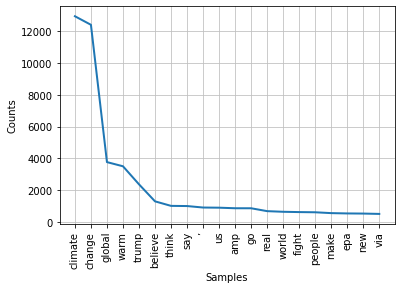

In [41]:
print("Top 20 words used in the tweets are : \n", tokens[:20])
print("\nFrequency distribution of top 20 words in the tweets.\n")
freq_words(tokens)

In [42]:
def word_cloud(tokens):
  '''A word cloud (also known as text clouds or tag clouds) is a visualization, 
  the more a specific word appears in the text, the bigger and bolder it appears in the word cloud.
  '''
  from wordcloud import WordCloud
  w = ' '.join([i for i in tokens])
  wc = WordCloud(width = 1000, height = 700, random_state=21, max_font_size=110).generate(w)
  plt.imshow(wc, interpolation = "bilinear")
  plt.axis('off')
  plt.show()


Word Cloud for the pre- processed data.


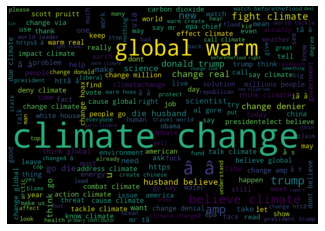

In [43]:
print("\nWord Cloud for the pre- processed data.")
word_cloud(tokens)

As we can see from the image above, we have a wordcloud showing tweets that have gone through preprocessing/cleaning.   

It is evident in the image that "Climate Change" covers the most tweeted words, which can be  attributed to factors like "Global Warm(ing)" also mentioned in the image 

### Resampling 

Recall from our Exploratory Data Analysis, we observed that the distribution of sentiment in the data was imbalanced. Hence the need for **Resampling**. SKlearn would be used to achieve this process

To explain this further, we will be defining the term:   
   * Data Resampling - which is a widely adopted technique for dealing with highly unbalanced datasets.  
   It consists of removing samples from the majority class in this case *downsampling* or adding samples to a minority class, in this case *upsampling*

**First let us store our sentiments into the two distint classes i.e Majority and Minority Class based on the class distribution**

In [139]:
#divide data into dataframe of majority and minority class with 4000 as the benchmark
df_majority = train_data[(train_data['sentiment']==1)] # majority as it has a value greater than benchmark
df_minority1 = train_data[(train_data['sentiment']==2)] # minority as it has a value lesser than benchmark
df_minority2 = train_data[(train_data['sentiment']==0)] # minority as it has a value lesser than benchmark
df_minority3 = train_data[(train_data['sentiment']==-1)] # minority as it has a value lesser than benchmark


Next, we will carry out upsampling on our minority classes

In [140]:
# upsample minority class
upsampled_minority1 = resample(df_minority1, 
                                 replace=True,    # sample with replacement
                                 n_samples= 8530, # to match majority class
                                 random_state=42)  # reproducible results

upsampled_minority2 = resample(df_minority2, 
                                 replace=True,    # sample with replacement
                                 n_samples= 8530, # to match majority class
                                 random_state=42) 

upsampled_minority3 = resample(df_minority3, 
                                 replace=True,    # sample with replacement
                                 n_samples= 8530, # to match majority class
                                 random_state=42) 


# Combine majority class with upsampled minority classes using pd.concat
data_upsampled = pd.concat([upsampled_minority1, upsampled_minority2, upsampled_minority3, df_majority])

We have managed to apportion the same amount of data samples seen in the majority class on our minority classes   

Next, we will check to see if we have equal amount of samples for all classes present

-1    8530
 2    8530
 1    8530
 0    8530
Name: sentiment, dtype: int64


(array([8530.,    0.,    0., 8530.,    0.,    0., 8530.,    0.,    0.,
        8530.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 10 Patch objects>)

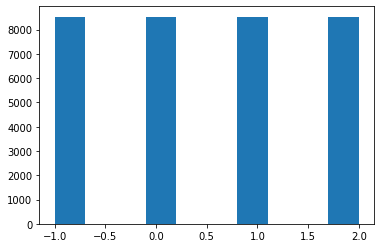

In [141]:
# check the value_counts of sentiments values
d = data_upsampled['sentiment']
print(d.value_counts())
plt.hist(d)

Now that we have a balanced set, let us go on to modeling !

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



##### TRAIN AND VALIDATION Split - 80% and 20% of the training data

In [143]:
# split data
x = data_upsampled.Preprocessed_text
y = data_upsampled['sentiment']  
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 1) #split data into 20% testing data
print("Number of data points in training data :\n")
print("X = ", len(x_train))
print("Y = ", len(y_train))

print("\nNumber of data points in validation data :\n")
print("X = ", len(x_val))
print("Y = ", len(y_val))

Number of data points in training data :

X =  27296
Y =  27296

Number of data points in validation data :

X =  6824
Y =  6824


We have evenly distributed our data into training data and validation data seen above

In [144]:
print("Now convert these pre processed text to numeric format to send it to the model.")
print("Using TF-IDF approach to covert text to numbers.\n")


"""To convert your dataset into corresponding TF-IDF feature vectors, you 
need to call the fit_transform  method on TfidfVectorizer  class and pass it our preprocessed dataset."""

vectorizer = TfidfVectorizer() #instantiate object
train_vectors = vectorizer.fit_transform(x_train) #fitted our training data into the vectorizer for conversion

val_vectors = vectorizer.transform(x_val) #trasnform the validation data into vector for testing 
print("Shape of training data : ",train_vectors.shape, "\nShape of validation data : ",val_vectors.shape)

Now convert these pre processed text to numeric format to send it to the model.
Using TF-IDF approach to covert text to numbers.

Shape of training data :  (27296, 13968) 
Shape of validation data :  (6824, 13968)


We have passed our training and validation data into the vectorizer, this helps to convert our texts into numbers i.e vctors for our machine to operate on

##### MODEL BUILDING - Testing out various Machine Learning Models to get the optimal

In this section of our notebook...
We will perform modeling using some machine learning models, and compare their performance

#### Logistic model

In [150]:
# building a LR Model using tf- idf approach
print("Building a Logistic Regression Model using tf- idf approach")

model_LR = LogisticRegression(C = 1, max_iter = 1000, n_jobs=-1)
model_LR.fit(train_vectors, y_train)
print("\n\nOur Sentiment Analyzer from Logistic Regression is ready and trained.")

y_pred3 = model_LR.predict(val_vectors)

Building a Logistic Regression Model using tf- idf approach


Our Sentiment Analyzer from Logistic Regression is ready and trained.


In [151]:
print(classification_report(y_val,y_pred3))

              precision    recall  f1-score   support

          -1       0.90      0.96      0.93      1679
           0       0.84      0.86      0.85      1677
           1       0.82      0.69      0.75      1723
           2       0.84      0.90      0.87      1745

    accuracy                           0.85      6824
   macro avg       0.85      0.85      0.85      6824
weighted avg       0.85      0.85      0.85      6824



##### SVC

In [148]:
SVCmodel = LinearSVC()
SVCmodel.fit(train_vectors, y_train)

y_pred2 = SVCmodel.predict(val_vectors)
print(classification_report(y_val,y_pred2))

              precision    recall  f1-score   support

          -1       0.94      0.98      0.96      1679
           0       0.87      0.94      0.91      1677
           1       0.90      0.72      0.80      1723
           2       0.87      0.94      0.90      1745

    accuracy                           0.89      6824
   macro avg       0.89      0.89      0.89      6824
weighted avg       0.89      0.89      0.89      6824



##### Naive Bayes

In [153]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes = BernoulliNB()
# Fit the model 
naive_bayes.fit(train_vectors, y_train)
y_pred2 = naive_bayes.predict(val_vectors)
print(classification_report(y_val,y_pred2))

              precision    recall  f1-score   support

          -1       0.86      0.89      0.87      1679
           0       0.80      0.74      0.77      1677
           1       0.76      0.65      0.70      1723
           2       0.77      0.90      0.83      1745

    accuracy                           0.80      6824
   macro avg       0.80      0.80      0.79      6824
weighted avg       0.80      0.80      0.79      6824



##### Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(train_vectors, y_train)

NameError: name 'model_Evaluate' is not defined

In [156]:
y_pred4 = forest.predict(val_vectors)
print(classification_report(y_val,y_pred4))

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      1679
           0       0.92      0.97      0.94      1677
           1       0.93      0.78      0.85      1723
           2       0.87      0.96      0.91      1745

    accuracy                           0.92      6824
   macro avg       0.93      0.92      0.92      6824
weighted avg       0.93      0.92      0.92      6824



In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### Carrying out Classification report and other metrics to test the model performance on the Validations set

Let us test the performance of our model on the validation set to predict the sentiment labels using the different ML models trained.
PERFORMANCE OF RANDOM FOREST MODEL : 

Predicting the sentiments...

Analysis after prediction : 

 2    28.062720
 0    25.908558
-1    24.765533
 1    21.263189
Name: predicted, dtype: float64


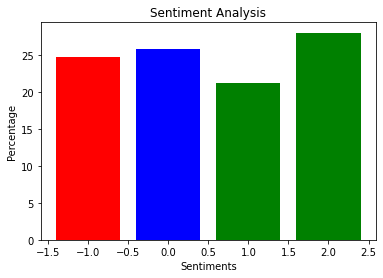

Confusion Matrix :
 [[1666    8    5    0]
 [   4 1620   32   21]
 [  20  129 1348  226]
 [   0   11   66 1668]]
classification report: 
               precision    recall  f1-score   support

          -1       0.99      0.99      0.99      1679
           0       0.92      0.97      0.94      1677
           1       0.93      0.78      0.85      1723
           2       0.87      0.96      0.91      1745

    accuracy                           0.92      6824
   macro avg       0.93      0.92      0.92      6824
weighted avg       0.93      0.92      0.92      6824

Accuracy score  =  92.35052754982415
----------------------------------------------------------------------------------------------------


In [157]:
def performance(model, y_true, vectors):
  from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  print("Predicting the sentiments...")
  y_pred = forest.predict(vectors)   #y_pred_RF = model_RF.predict(val_vectors)
  df = pd.DataFrame({'actual' : y_true, 'predicted' : y_pred})
  print("\nAnalysis after prediction : \n")
  d = df['predicted'].value_counts(normalize = True) * 100 # series
  print(d)
  ## plot for analysis
  plt.bar(x = d.index, height = d.values, label = d.index, color= ['green','blue','red'])
  plt.xlabel("Sentiments")
  plt.ylabel("Percentage")
  plt.title('Sentiment Analysis')
  plt.show()
  
  cm = confusion_matrix(y_true,y_pred)
  crp = classification_report(y_true,y_pred)
  acc = accuracy_score(y_true,y_pred)
  return (cm, crp, acc)

print("Let us test the performance of our model on the validation set to predict the sentiment labels using the different ML models trained.")
print("PERFORMANCE OF RANDOM FOREST MODEL : \n")
perform = performance(forest, y_val, val_vectors)
print("Confusion Matrix :\n", perform[0])  
print("classification report: \n", perform[1])  
print("Accuracy score  = ", perform[2] *100)
print("-" * 100)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---